# Import dependencies

In [18]:
from IPython.display import display, Image
import cv2

# Take image and display inline

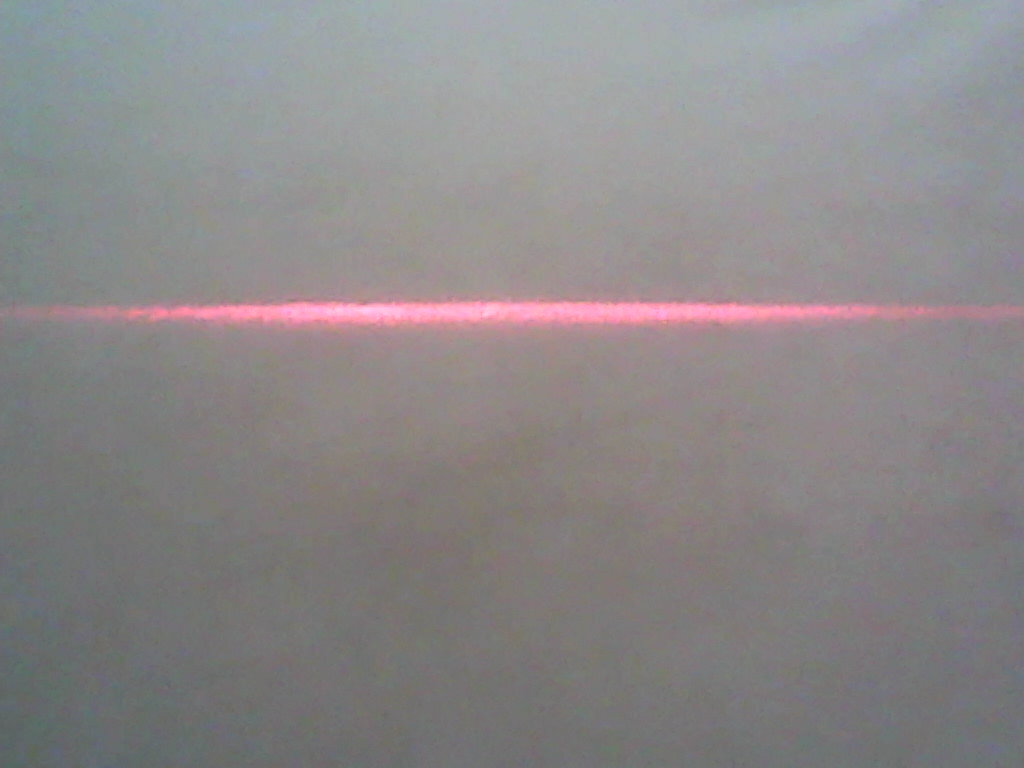

In [19]:
from IPython.display import display, Image
import cv2

# Open the first available camera
cap = cv2.VideoCapture(0)

# Check if the camera was successfully opened
if not cap.isOpened():
    print("Unable to open camera")
    exit()

# Capture a frame from the camera
ret, frame = cap.read()

# Check if the frame was successfully captured
if not ret:
    print("Unable to capture frame")
    exit()

# Display the captured frame
_, png = cv2.imencode('.png', frame)
display(Image(data=png))

# # reduce to only the red channel
# print("red channel")
# _, png = cv2.imencode('.png', frame[:,:,2])
# display(Image(data=png))

# print("green channel")
# _, png = cv2.imencode('.png', frame[:,:,1])
# display(Image(data=png))

# print("blue channel")
# _, png = cv2.imencode('.png', frame[:,:,0])
# display(Image(data=png))

# # Wait for a key press to exit
# cv2.waitKey(0)

# # Release the camera and close the window
# cap.release()
# cv2.destroyAllWindows()


# # Release the camera and close the window


In [20]:
cap.release()
cv2.destroyAllWindows()

# Save Image

In [21]:
# save the image as a file
cv2.imwrite('test1.jpg',frame)
# save as png file
cv2.imwrite('test1.png',frame)

True

# Load image

In [19]:
#load the image
frame = cv2.imread('test1.jpg')

# Show color channels

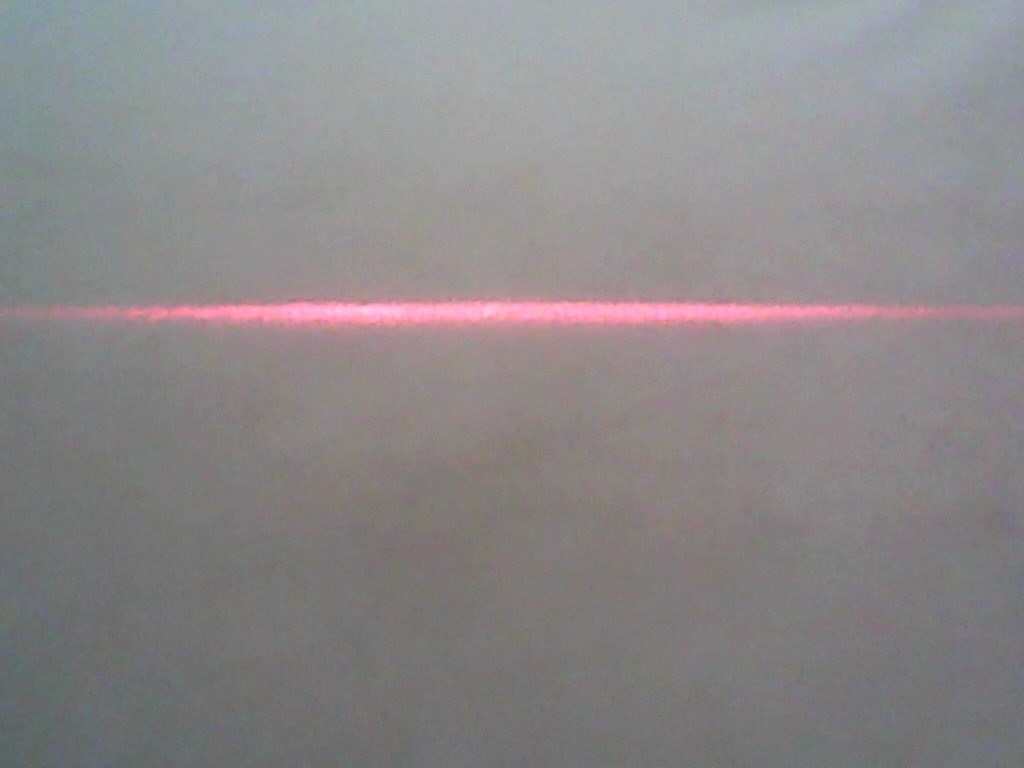

red channel


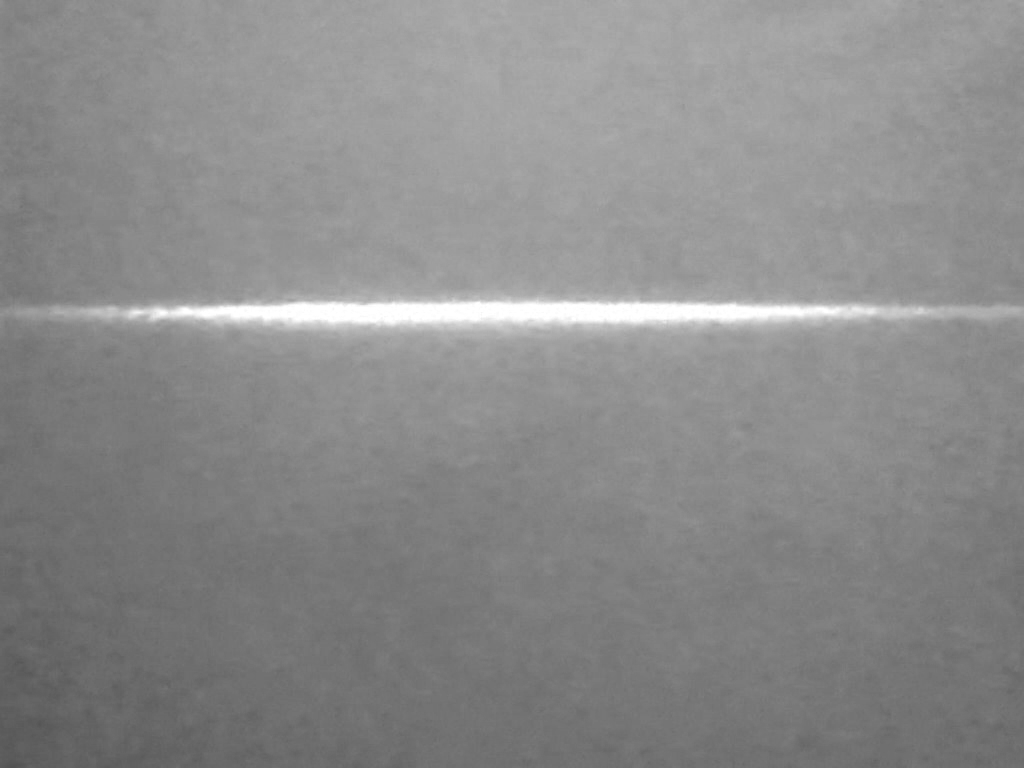

green channel


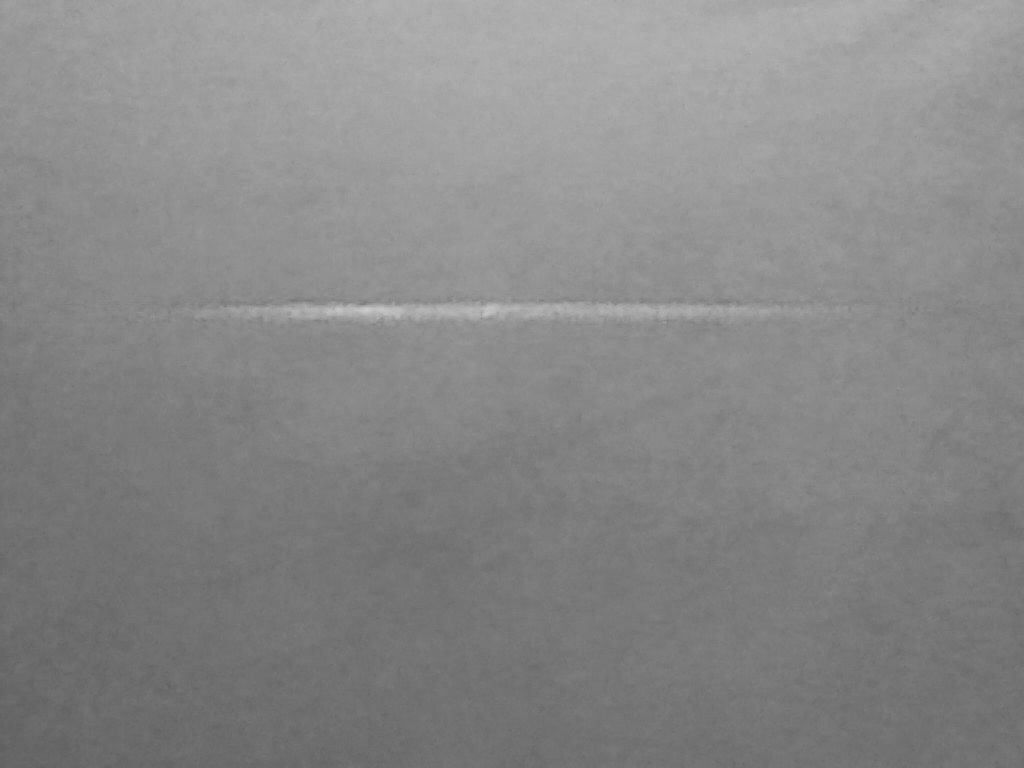

blue channel


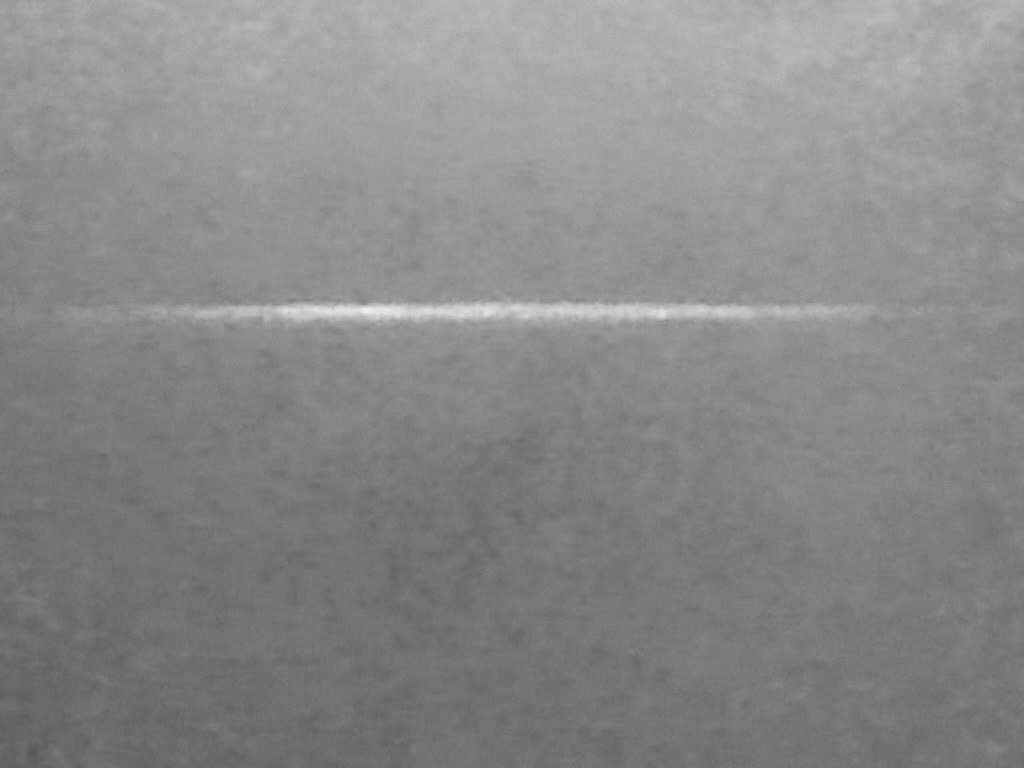

In [20]:
# Display the captured frame
_, png = cv2.imencode('.png', frame)
display(Image(data=png))

# # reduce to only the red channel
print("red channel")
_, png = cv2.imencode('.png', frame[:,:,2])
display(Image(data=png))

print("green channel")
_, png = cv2.imencode('.png', frame[:,:,1])
display(Image(data=png))

print("blue channel")
_, png = cv2.imencode('.png', frame[:,:,0])
display(Image(data=png))

# Show color channels (alternative approach)

(768, 1024)


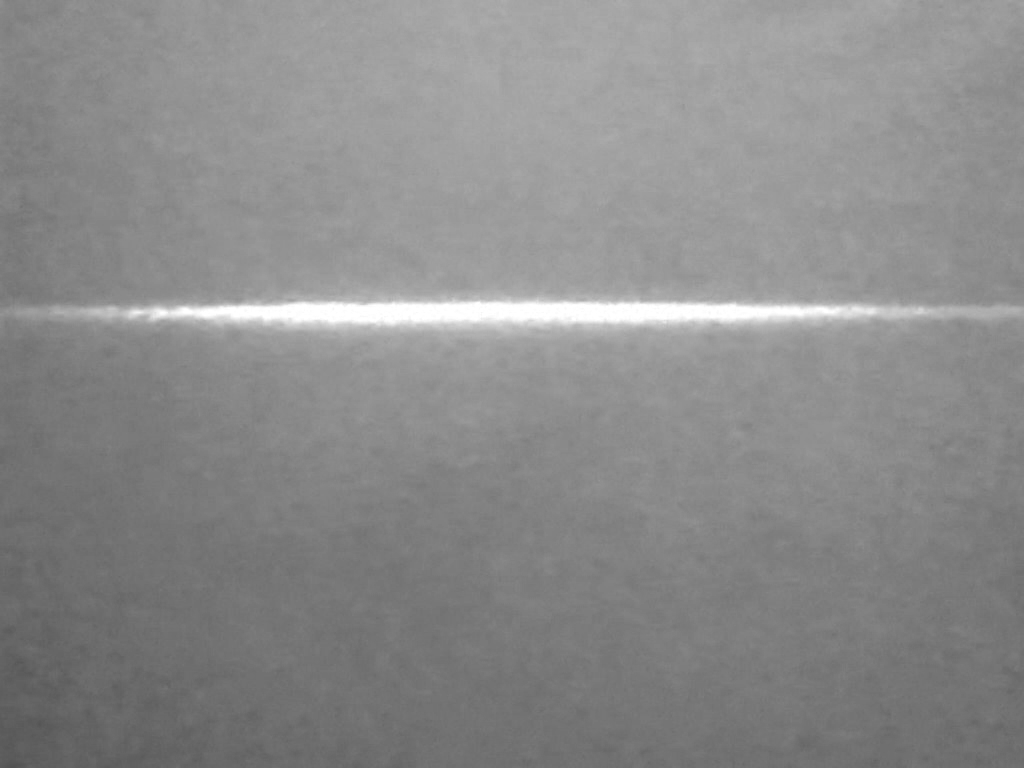

(768, 1024)


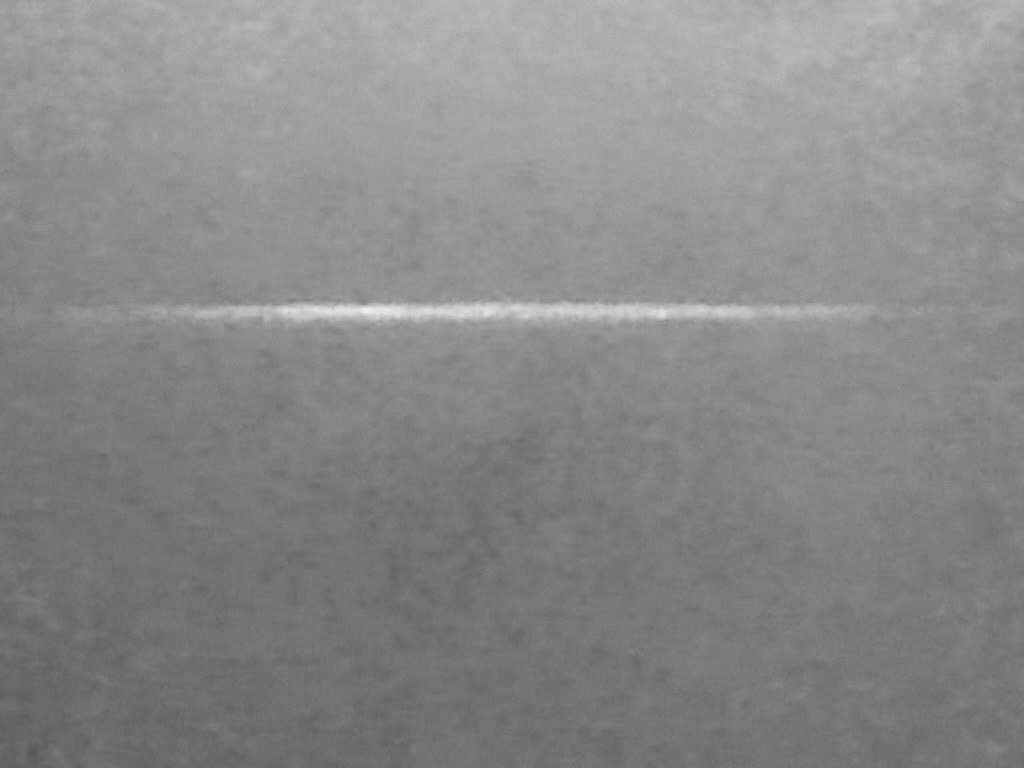

(768, 1024)


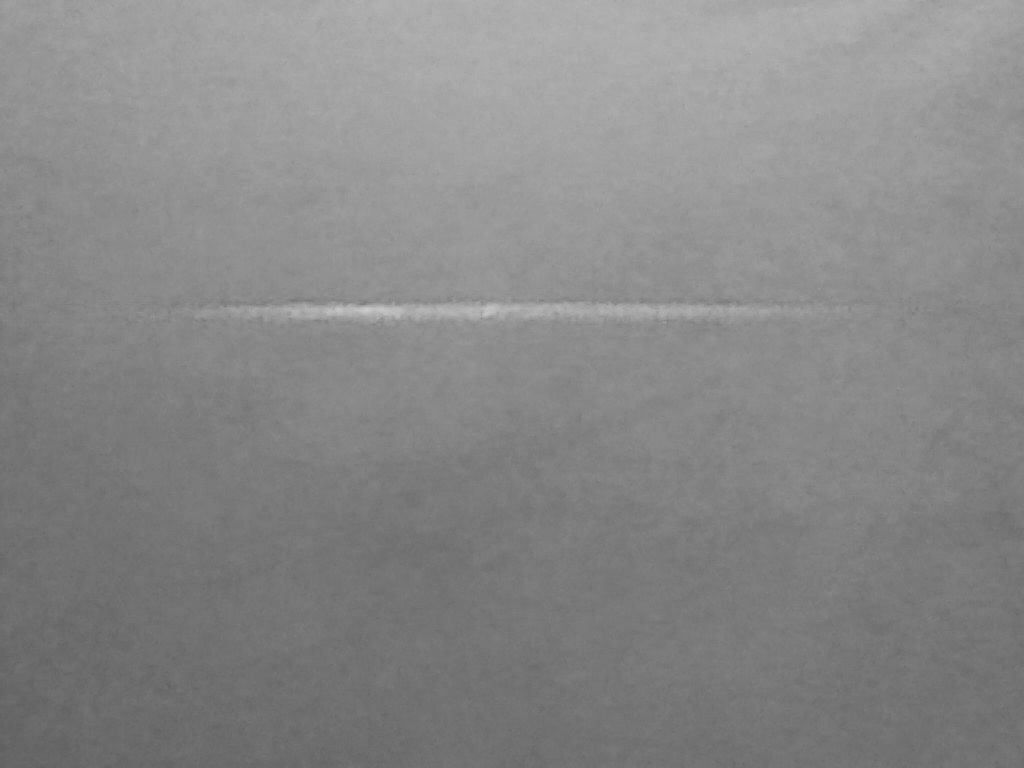

In [21]:

rgb = frame.copy()
r = rgb[:,:,2]
g = rgb[:,:,0]
b = rgb[:,:,1]


#show the dimensions of the image array
print(r.shape)
_, png = cv2.imencode('.png', r)
display(Image(data=png))

print(g.shape) 
_, png = cv2.imencode('.png', g)
display(Image(data=png))

print(b.shape)
_, png = cv2.imencode('.png', b)
display(Image(data=png))



(768, 1024, 3)
(768, 1024)
(768, 1024)


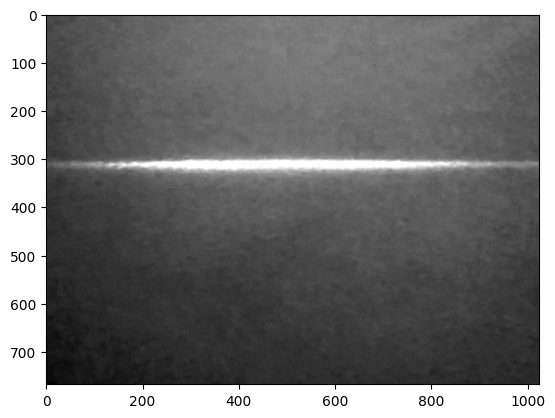

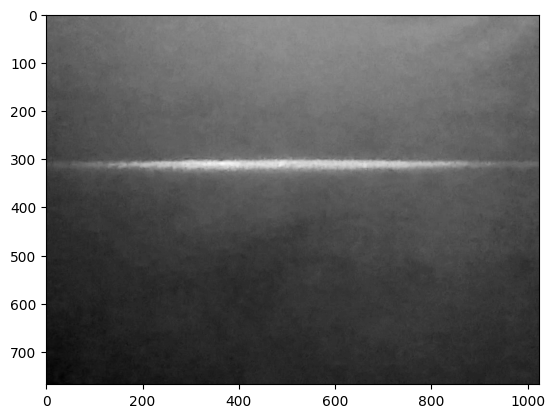

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread('test1.jpg')
print(img.shape)

img_greyscale_png = np.mean(img, -1)

img_red = img[:,:,0].copy()

# reduce brightness
# img_red[img_red < 0.1] = 0

print(img_red.shape)
print(img_greyscale_png.shape)



plt.imshow(img_red, cmap='gray')
plt.show()

plt.imshow(img_greyscale_png, cmap='gray')
plt.show()


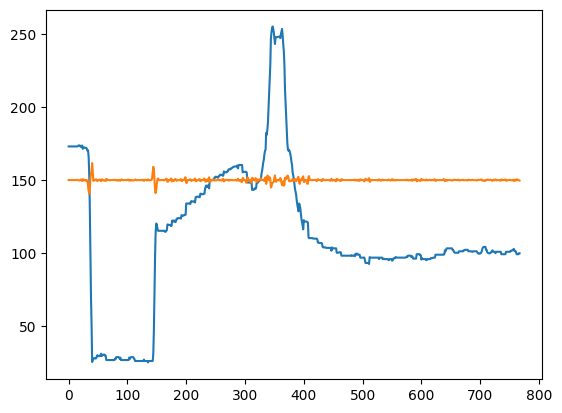

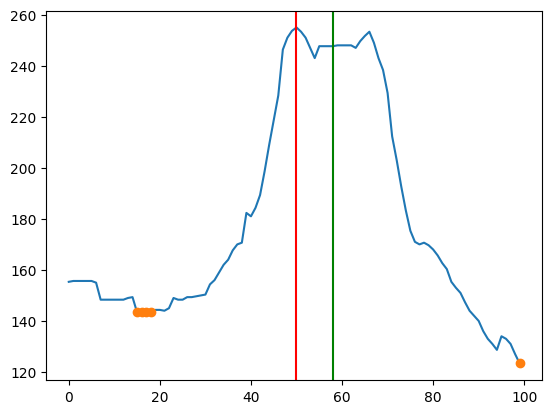

# find the weighted centerpoint of a peak

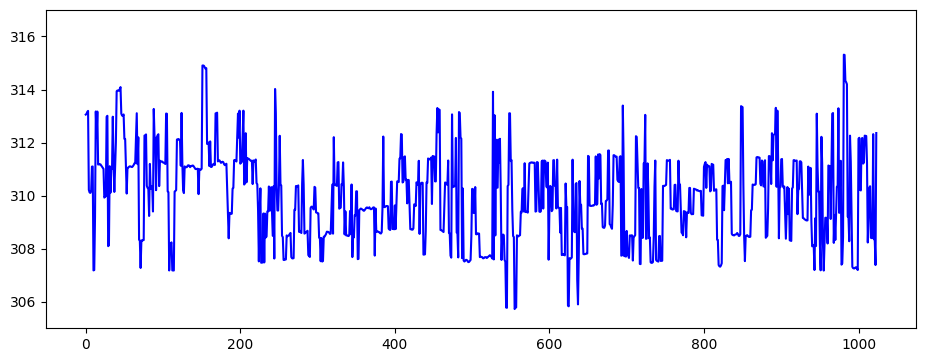

standard deviation, png: 1.6718341374869685


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import argrelextrema
import pandas as pd
from math import factorial

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """

    
    try:
        window_size = np.abs(int(window_size))
        order = np.abs(int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

def find_peaks_simple(img_greyscale, i, plotting=False):
    # take only the i-th column of image
    current_column = img_greyscale[:,i]
    
    # Fit a line through the plot of current column
    coefficients = np.polyfit(range(len(current_column)), current_column, 1)
    line = np.polyval(coefficients, range(len(current_column)))
    subtracted = current_column - line
    if plotting:
        # Plot the line
        plt.plot(range(len(current_column)), line, color='r')
        # Plot the subtracted line
        plt.plot(range(len(current_column)), subtracted, color='g')
        #draw vertical line at the max of the subtracted
        plt.axvline(x=np.argmax(subtracted), color='b', linestyle='-')
        plt.show()
    return np.argmax(subtracted)

def find_weighted_centerpoint(img_greyscale, i, plotting=False):
    # take only the i-th column of image
    current_column = img_greyscale[:,i]

    
    #ax1.plot(first_column)
    smoothed=savitzky_golay(current_column, 31, 4)
    o1_gradient=np.gradient(smoothed)
    o2_gradient=np.gradient(o1_gradient)
    o3_gradient=np.gradient(o2_gradient)
    
    rolling_var = pd.Series(o1_gradient).rolling(window=10)

    o1_smoothed=savitzky_golay(o1_gradient, 31, 4)

   

    if plotting == "debug":
        fig, ax1 = plt.subplots()
        #set plotsize
        fig.set_size_inches(18.5, 10.5)
        ax2 = ax1.twinx()
        ax1.plot(current_column,color='b')
        ax2.plot(smoothed,color='g')
        # ax2.plot(rolling_var)
        # ax2.plot(np.gradient(np.gradient(smoothed)),color='r')
        # ax2.plot(np.gradient(np.gradient(np.gradient(smoothed))),color='y')
        plt.show()

    if plotting:
        fig, ax1 = plt.subplots()
        #set plotsize
        fig.set_size_inches(18.5, 10.5)
        ax2 = ax1.twinx()
        ax1.plot(smoothed,color='b')
        ax2.plot(o1_smoothed,color='g')
        # ax2.plot(rolling_var)
        #ax2.plot(np.gradient(np.gradient(smoothed)),color='r')
        #ax2.plot(np.gradient(np.gradient(np.gradient(smoothed))),color='y')
        plt.show()

    # find the peak area



    coefficients = np.polyfit(range(len(current_column)), current_column, 1)
    line = np.polyval(coefficients, range(len(current_column)))
    subtracted = current_column - line

    peak = np.argmax(subtracted)
    if peak < 51 or peak > len(current_column)-51:
        raise ValueError("Peak is too close to the edge of the image")
    peak_area = current_column[peak-50:peak+50]
    
    # find the local maxima
    local_max = np.argmax(peak_area)
    
    # find the local minima
    local_min = argrelextrema(peak_area, np.less_equal, order=10)
    
    # find the last minimum before the peak and the first minimum after the peak
    last_min_idx = local_min[0][local_min[0] < local_max][-1]
    first_min_idx = local_min[0][local_min[0] > local_max][0]

    # calculate the weighted centerpoint between the last and first minimum
    weighted_centerpoint = np.average(np.arange(last_min_idx, first_min_idx+1), weights=peak_area[last_min_idx:first_min_idx+1])

    # calculate the center of mass of the peak area
    center_of_mass = np.average(np.arange(100), weights=peak_area)

    if plotting:
        # plot the weighted centerpoint
        plt.plot(peak_area)
        plt.axvline(x=local_max, color='r', linestyle='-')
        plt.plot(local_min[0], peak_area[local_min[0]], 'o')
        plt.axvline(x=weighted_centerpoint, color='g', linestyle='-')
        plt.axvline(x=center_of_mass, color='b', linestyle='-')
        plt.show()

    return center_of_mass+peak-50 #, local_max+peak-50, weighted_centerpoint+peak-50, 
    return weighted_centerpoint

# load the image and convert it to grayscale
img_png = mpimg.imread('test1.png')
img_greyscale_png = np.dot(img_png[...,:3], [0.5, 0.5870, 0.1140]) # 0.2989, 0.5870, 0.1140


# find the weighted centerpoint for the i-th column of the image
# print(img_greyscale.shape[1])
# for i in range(img_greyscale.shape[1]):
#     print(i)
#     weighted_centerpoints = find_weighted_centerpoint(img_greyscale, i)
# print(weighted_centerpoints)
peaks_png = [find_weighted_centerpoint(img_greyscale_png, i, plotting=False) for i in range(img_greyscale_png.shape[1])]
x_png = range(len(peaks_png))
y_png = [peak for peak in peaks_png]
plt.figure(figsize=(28.5/2.54, 10.5/2.54))
plt.plot(x_png, y_png, color='blue', label='center of mass')
plt.ylim(305, 317)
plt.show()

# std_png = np.std(peaks_png)
# print("standard deviation, png: " + str(std_png))


# compare jpg and png

In [ ]:
# load the image and convert it to grayscale
img_png = mpimg.imread('test1.png')
img_jpg = mpimg.imread('test1.jpg')
img_greyscale_png = np.dot(img_png[...,:3], [0.5, 0.5870, 0.1140]) # 0.2989, 0.5870, 0.1140
img_greyscale_jpg = np.dot(img_jpg[...,:3], [0.5, 0.5870, 0.1140]) # 0.2989, 0.5870, 0.1140



# find the weighted centerpoint for the i-th column of the image
# print(img_greyscale.shape[1])
# for i in range(img_greyscale.shape[1]):
#     print(i)
#     weighted_centerpoints = find_weighted_centerpoint(img_greyscale, i)
# print(weighted_centerpoints)
peaks_png = [find_weighted_centerpoint(img_greyscale_png, i, plotting=False) for i in range(img_greyscale_png.shape[1])]
x_png = range(len(peaks_png))
y_png = [peak for peak in peaks_png]
plt.figure(figsize=(28.5/2.54, 10.5/2.54))
plt.plot(x_png, y_png, color='blue', label='center of mass')
plt.ylim(305, 317)
plt.show()

peaks_jpg = [find_weighted_centerpoint(img_greyscale_jpg, i, plotting=False) for i in range(img_greyscale_jpg.shape[1])]
x_jpg = range(len(peaks_jpg))
y_jpg = [peak for peak in peaks_jpg]
plt.figure(figsize=(28.5/2.54, 10.5/2.54))
plt.plot(x_jpg, y_jpg, color='red', label='center of mass')
plt.ylim(305, 317)
plt.show()


difference = [peaks_png[i] - peaks_jpg[i] for i in range(len(peaks_png))]

print(max(difference))
#find the index of the maximum difference
print(difference.index(max(difference)))

#calculate standard deviation
std_png = np.std(peaks_png)
std_jpg = np.std(peaks_jpg)
print("standard deviation, png: " + str(std_png))
print("standard deviation, jpg: " + str(std_jpg))

# Rest of your code...
plt.figure(figsize=(28.5/2.54, 10.5/2.54))
plt.plot(x_png, difference, color='green', label='difference')
plt.legend()
plt.show()

# edge detection

[[[305.          1.5707964]]

 [[319.          1.5707964]]

 [[303.          1.5707964]]

 [[321.          1.5707964]]

 [[311.          1.553343 ]]

 [[293.          1.5882496]]]


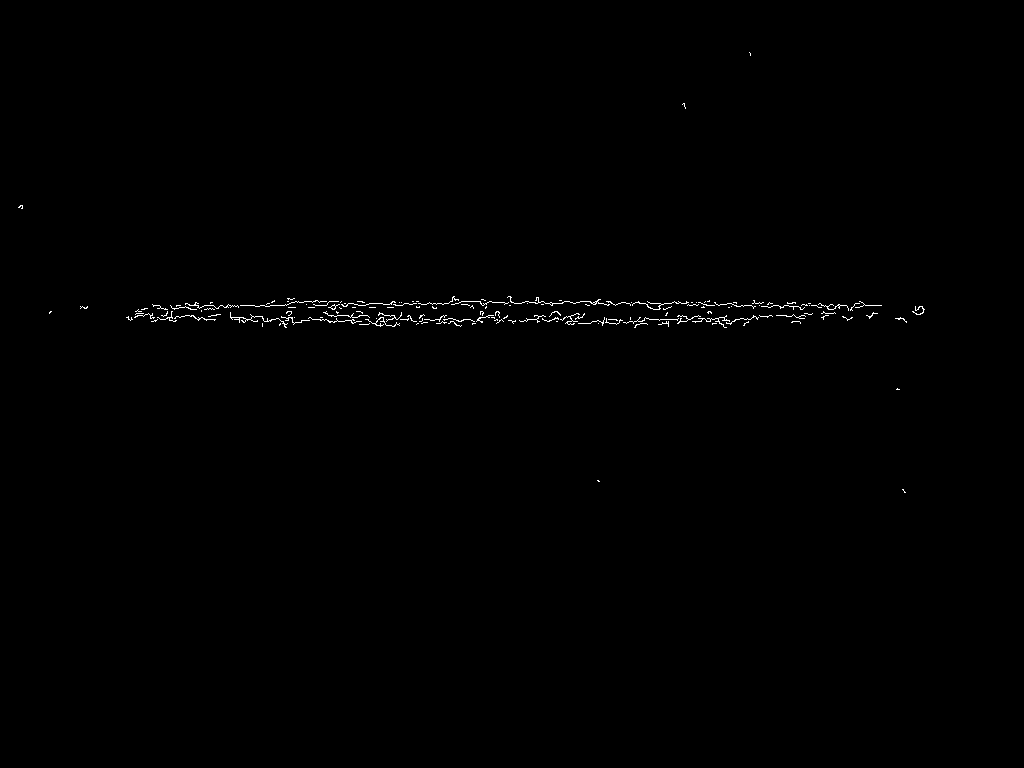

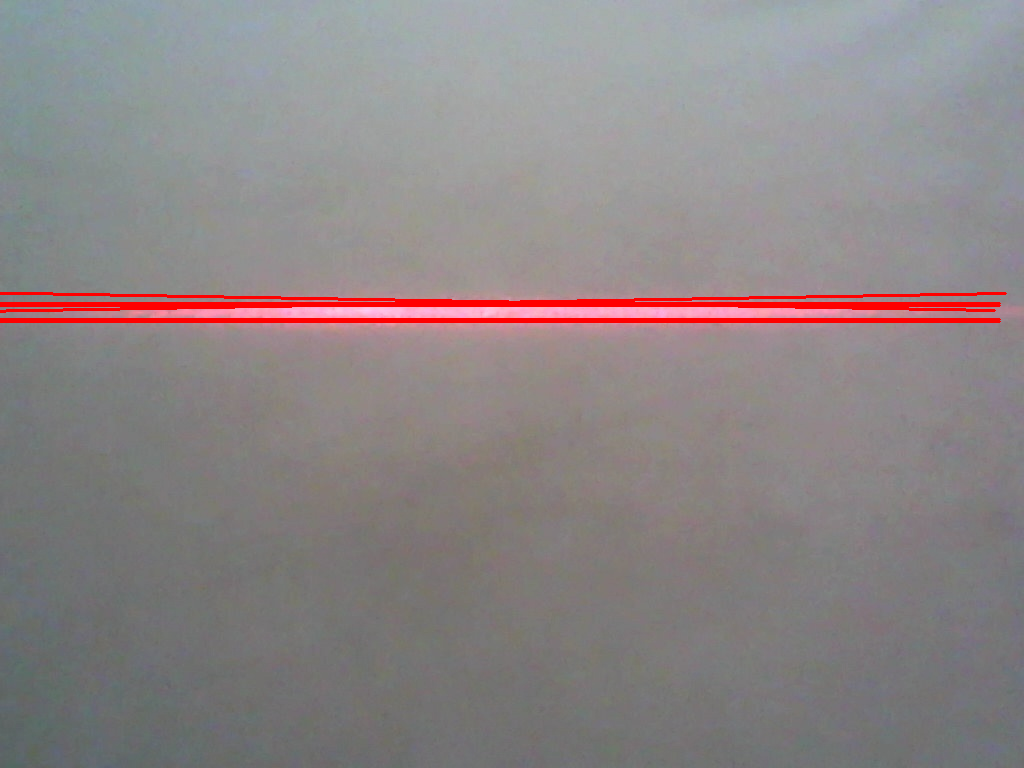

In [28]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('test1.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 30, 50)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)
print(lines)

# Draw the lines on the original image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y_png = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y_png), (x2, y2), (0, 0, 255), 2)

# # Display the image with lines
display(Image(data=cv2.imencode('.png', edges)[1]))
display(Image(data=cv2.imencode('.png', image)[1]))
# cv2.imshow('Lines', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
